In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from utils.coordinate_descent import coordinate_descent
from utils.shrinkage import shrink
from learn_dictionary import learn_dictionary
import numpy as np
from utils.create_patches import create_patches
from utils.prox_l1 import prox_l1

In [ ]:
# Path to where the data is stored 
path = 'data/train/'

# Reading the text file that contains names of all the images
fp = open('data/iids_train.txt')
lines = fp.read().splitlines() # Create a list containing all lines
fp.close()

# The number of patches that will be randomly generated from each image
num_patches = 10
alpha = 0.01
num_epochs = 1000
lr = 0.01
beta = 0.9

# # Generate a mini-batch
# mini_batch = create_patches(path, lines, num_patches)

# print(mini_batch.shape)

# plt.imshow(mini_batch[:,1].reshape(10,10), cmap = 'gray')

Wd, loss = learn_dictionary(num_epochs, path, lines, num_patches, alpha, lr, beta)

In [ ]:
np.savetxt('Wd.txt', Wd)

# Learning the Dictionary

In [ ]:
plt.plot(loss)

In [ ]:
# Getting the dimensions for our problem
n = 3 
m = 4 # 4 times over-complete problem set up

# Randomly initializing the dictionary
W_d = np.random.rand(n, m)

# Hyper-parameters
num_epochs = 1000

In [ ]:
for i in range(num_epochs):
    # Get Z from COD algorithm by making call to that function
    
    # Compute the loss for the batch
    
    # Store the loss for the batch
    
    # Compute the gradient of the loss function
    
    # Update the parameter W_d
    

In [ ]:
Wd = np.random.normal(0, 1/5, (5,10))
Wd = Wd / np.linalg.norm(Wd, axis=0)
Z_true = np.transpose(np.array([[1,0,0,1,0,0,0,1,0,0], [1,0,0,0,0,0,0,0,1,1], [1,0,1,1,0,0,0,0,0,0], [0,0,0,1,0,0,0,1,0,0]]))
X = np.matmul(Wd, Z_true)
alpha = 0.01

In [ ]:
Z = coordinate_descent(X, Wd, alpha)

In [ ]:
index = np.arange(4)
k = np.argmax(np.abs(Z), axis=0)

In [ ]:
Z[k, index].shape

In [ ]:
np.choose(k,Z).shape

In [ ]:
# Path to where the data is stored 
path = 'data/train/'

# Reading the text file that contains names of all the images
fp = open('data/iids_train.txt')
lines = fp.read().splitlines() # Create a list containing all lines
fp.close()

# The number of patches that will be randomly generated from each image
num_patches = 10
alpha = 0.01
num_epochs = 100
lr = 1e-4


mini_batch = create_patches(path, lines, num_patches)

In [ ]:
Wd = np.random.normal(0, 1/5, (5,10))
Wd = Wd / np.linalg.norm(Wd, axis=0)
Z_true = np.transpose(np.array([[1,0,0,1,0,0,0,1,0,0], [1,0,0,0,0,0,0,0,1,1], [1,0,1,1,0,0,0,0,0,0], [0,0,0,1,0,0,0,1,0,0]]))
X = np.matmul(Wd, Z_true)
alpha = 0.01
Z = np.zeros(Z_true.shape)

In [ ]:
for i in range(10000):
    Z = prox_l1(X, Z, Wd, alpha)

In [ ]:
print(Z)

In [5]:
from sklearn.feature_extraction import image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

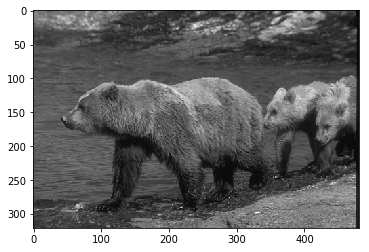

In [6]:
im = imread('data/train/100075.jpg')
im_gray = rgb2gray(im)
plt.imshow(im_gray, cmap = 'gray')

In [4]:
output = image.extract_patches_2d(im_gray, (10, 10))
[num_patches, j, k] = output.shape

In [ ]:
alpha = 0.01
# Setting the dimensions for the dictionary
n = 100
m = 400 

# Randomly initilialize the dictionary 
Wd = np.random.normal(0, 1/n, (n, m))
# Normalizing the columns of the dictionary to unit magnitude
Wd = Wd / np.linalg.norm(Wd, axis=0)

# Creating a list to store the loss for each epoch
total_loss = []

# Stores the gradient of the loss wrt W
Wd_grad = 0

In [ ]:
for i in range(num_patches):
    # Cumulatively stores the loss over the mini-batch
    loss = 0
    
    X = output[i].reshape(100,1)
    
    Z = coordinate_descent(X, Wd, alpha)
    loss = (0.5 * np.linalg.norm(X - np.matmul(Wd, Z))**2) / X.shape[1]
    Wd_grad = np.matmul(np.matmul(Wd, Z) - X, np.transpose(Z)) / X.shape[1]

    # Storing the loss
    total_loss.append(loss)

    # Updating the dictionary Wd
    Wd = Wd - (1 / np.linalg.norm(Z, 2)) * Wd_grad
    
    if i % 100 == 0:
        print('epoch: {}'.format(i))
        print('loss: {}'.format(total_loss[i]))

In [ ]:
plt.title('Randomly Selected Basis Vectors')
plt.subplot(3,3,1)
plt.imshow(Wd[:,1].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,2)
plt.imshow(Wd[:,100].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,3)
plt.imshow(Wd[:,150].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,4)
plt.imshow(Wd[:,50].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,5)
plt.imshow(Wd[:,50].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,6)
plt.imshow(Wd[:,200].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,7)
plt.imshow(Wd[:,300].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,8)
plt.imshow(Wd[:,399].reshape(10,10), cmap = 'gray')
plt.subplot(3,3,9)
plt.imshow(Wd[:,275].reshape(10,10), cmap = 'gray')

plt.savefig('/Users/abhyudaypuri/Downloads/Dict.png')

In [ ]:
plt.imshow(Wd[:,2].reshape(10,10), cmap = 'gray')

In [ ]:
plt.imshow(Wd[:,3].reshape(10,10), cmap = 'gray')

In [ ]:
np.savetxt('Wd.txt', Wd)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from skimage.color import rgb2gray
from skimage.io import imread
from utils.fast_ista import fast_ista

In [8]:
Wd = np.load('Wd.npy')

(320, 480)


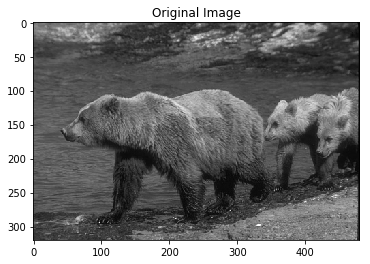

In [9]:
X = imread('data/train/100075.jpg')
X = rgb2gray(X)
X = X[0:320,0:480]
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.savefig('/Users/abhyudaypuri/Downloads/Orig.png')
print(X.shape)

In [10]:
X_patched = np.zeros((100, 32*48))

for i in range(32):
    for j in range(48):
        X_patched[:, 48*i + j] = X[10*i: 10*(i+1), 10*j: 10*(j+1)].reshape((100))

print(X_patched.shape)

(100, 1536)


In [15]:
alpha = 0.1
Z = fast_ista(X_patched, Wd, alpha)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [16]:
X_reconstructed = np.zeros(X.shape)
X_temp = np.matmul(Wd, Z)

for i in range(32):
    for j in range(48):
        X_reconstructed[10*i : 10*(i+1), 10*j : 10*(j+1)] = X_temp[:, 48*i + j].reshape((10,10))

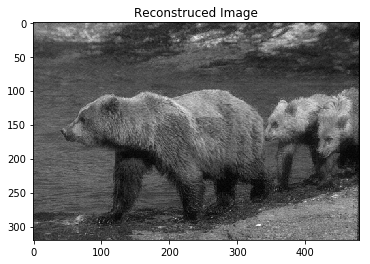

In [17]:
plt.imshow(X_reconstructed, cmap='gray')
plt.title('Reconstruced Image')
plt.savefig('/Users/abhyudaypuri/Downloads/Recon.png')

In [18]:
np.linalg.norm(X - X_reconstructed)

12.13845408469557

In [5]:
# Path to where the data is stored 
path = 'data/train/'

# Reading the text file that contains names of all the images
fp = open('data/iids_train.txt')
lines = fp.read().splitlines() # Create a list containing all lines
fp.close()

In [6]:
# The number of patches that will be randomly generated from each image
num_patches = 10000

X = create_patches(path, lines, num_patches)
print(X.shape)

(100, 2000000)


In [13]:
alpha = 0.1
Z = fast_ista(X[:, 0:1000], Wd, alpha)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


KeyboardInterrupt: 